# Housing Project - Minneapolis, MI

This project is centered on the analysis of real estate markets in college towns, with a specific focus on Minneapolis, MN. College towns often present unique investment opportunities in real estate due to the steady demand from students, particularly in light of the increasing college enrollment trends. This study aims to leverage regression analysis to understand and predict house sale prices in such towns.

## Initial Regression Models and Analyses

The project involves creating a series of regression models to identify the factors influencing the sale price of single-family houses in Minneapolis. Using data from 2016, the relationships between sale price and variables such as square footage, number of bedrooms and bathrooms, and lot size are explored. Five distinct models are created:

Model A: Sale amount as a function of square footage.

Model B: Sale amount as a function of the number of bedrooms.

Model C: Including both square footage and number of bedrooms.

Model D: Extending to include the number of bathrooms.

Model E: Incorporating all the aforementioned variables plus lot size.

### Model A: Sale_amount ~ Sqft_home



Call:
lm(formula = Sale_amount ~ Sqft_home, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356718  -63532    5379   56414  611596 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -40073.704  15674.880  -2.557    0.011 *  
Sqft_home      189.203      8.552  22.123   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 114100 on 315 degrees of freedom
Multiple R-squared:  0.6084,	Adjusted R-squared:  0.6072 
F-statistic: 489.4 on 1 and 315 DF,  p-value: < 2.2e-16


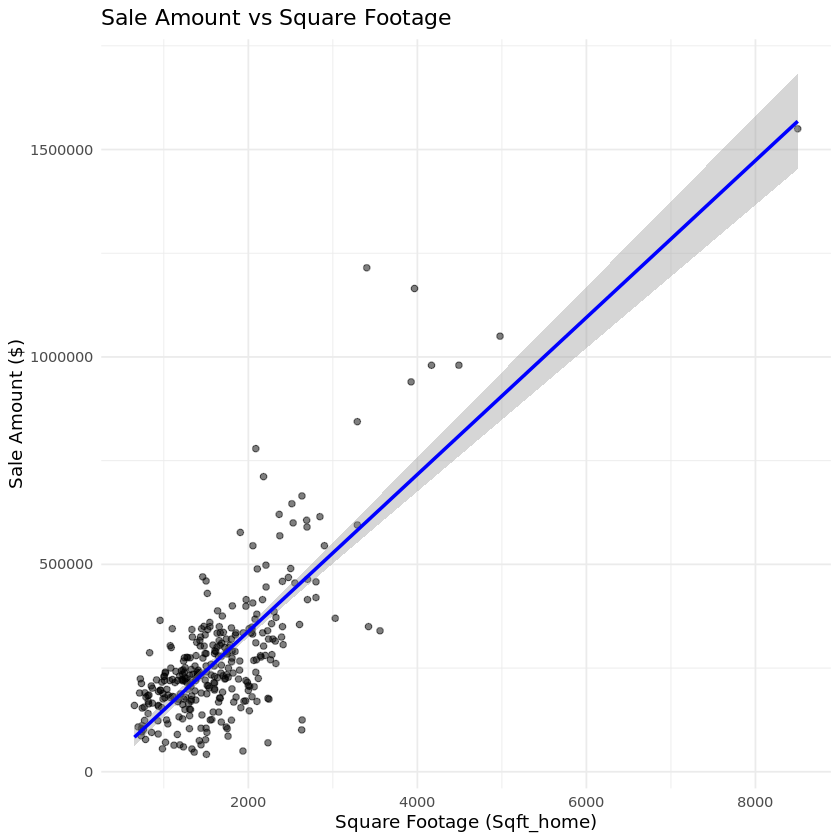

In [2]:
# Load necessary libraries
library(readxl)
library(dplyr)
library(ggplot2)

# Load data from Excel file
data <- read_excel("Final Project-BU629.xlsx")

# Filter data for single-family homes in Minneapolis
filtered_data <- data %>% 
                 filter(Type == "Single Family", Town == "Minneapolis, MN")

# Create and summarize regression model: Sale_amount = β0 + β1Sqft_home + ɛ
model_a <- lm(Sale_amount ~ Sqft_home, data = filtered_data)
summary(model_a) # Print model summary

# Visualization for Model a: Sale_amount vs Sqft_home
ggplot(filtered_data, aes(x = Sqft_home, y = Sale_amount)) +
  geom_point(alpha = 0.5) + # Plot data points
  geom_smooth(method = "lm", formula = y ~ x, color = "blue") + # Add regression line
  labs(title = "Sale Amount vs Square Footage",
       x = "Square Footage (Sqft_home)",
       y = "Sale Amount ($)") +
  theme_minimal() # Use a minimalistic theme


### Model A Analysis

*Coefficients:*

Intercept: The base price for a house (without considering square footage) is estimated to be about -$40,073, which makes sense if you consider that nobody would buy a 0 sqft home.

Sqft_home: Each additional square foot of home space is estimated to add about $189.20 to the sale price.

*Model Fit:*

R-squared: 60.84% of the variation in sale prices is explained by this model, which is relatively high.

Residual Standard Error: There's a typical deviation of approximately $114,100 from the fitted line.

Statistical Significance: The square footage is highly statistically significant in predicting sale price.


### Model B: Sale_amount ~ Beds

In [ ]:
# Model b: Sale_amount = β0 + β1Beds + ɛ
model_b <- lm(Sale_amount ~ Beds, data = filtered_data)
print(summary(model_b)) 

# Average Sale Price by Number of Bedrooms
avg_price_by_bedrooms <- filtered_data %>%
                         group_by(Beds) %>%
                         summarize(Average_Sale_Price = mean(Sale_amount, na.rm = TRUE))

ggplot(avg_price_by_bedrooms, aes(x = Beds, y = Average_Sale_Price)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Average Sale Price by Number of Bedrooms",
       x = "Number of Bedrooms", y = "Average Sale Price ($)")


Call:
lm(formula = Sale_amount ~ Beds, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-393408  -82637  -13737   51263  881328 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -24377      32955   -0.74     0.46    
Beds           99007      10433    9.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 160800 on 315 degrees of freedom
Multiple R-squared:  0.2223,	Adjusted R-squared:  0.2199 
F-statistic: 90.06 on 1 and 315 DF,  p-value: < 2.2e-16



### Model B Analysis

*Coefficients:*

Beds: Each additional bedroom is estimated to add about $99,007 to the sale price.

*Model Fit:*

R-squared: Only 22.23% of the variation in sale prices is explained by this model, which is quite low.

Statistical Significance: The number of bedrooms is statistically significant in predicting sale price.


### Model C: Sale_amount ~ Sqft_home + Beds

In [7]:
# Model c: Sale_amount = β0 + β1Sqft_home + β2Beds + ɛ
model_c <- lm(Sale_amount ~ Sqft_home + Beds, data = filtered_data)
print(summary(model_c))


Call:
lm(formula = Sale_amount ~ Sqft_home + Beds, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356919  -61201    4345   57574  627960 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8138.62   23206.96   0.351  0.72605    
Sqft_home      212.00      11.76  18.030  < 2e-16 ***
Beds        -28425.12   10178.65  -2.793  0.00555 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 112900 on 314 degrees of freedom
Multiple R-squared:  0.6179,	Adjusted R-squared:  0.6155 
F-statistic: 253.9 on 2 and 314 DF,  p-value: < 2.2e-16



### Model C Analysis

*Coefficients:*

Sqft_home: Each additional square foot of home space adds about $212.

Beds: Each additional bedroom is estimated to decrease the sale price by $28,425, which is counterintuitive and may suggest multicollinearity or other issues in the model.

*Model Fit:*

R-squared: 61.79% of the variation in sale prices is explained by this model.

Statistical Significance: Both square footage and number of bedrooms are statistically significant.


### Model D: Sale_amount ~ Sqft_home + Beds + Baths

In [8]:
# Model d: Sale_amount = β0 + β1Sqft_home + β2Beds + β3Baths + ɛ
model_d <- lm(Sale_amount ~ Sqft_home + Beds + Baths, data = filtered_data)
print(summary(model_d))


Call:
lm(formula = Sale_amount ~ Sqft_home + Beds + Baths, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-357492  -62802    3268   57877  632102 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5547.23   23575.62   0.235   0.8141    
Sqft_home      206.76      14.32  14.441   <2e-16 ***
Beds        -28779.71   10203.08  -2.821   0.0051 ** 
Baths         7221.64   11230.21   0.643   0.5207    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113000 on 313 degrees of freedom
Multiple R-squared:  0.6184,	Adjusted R-squared:  0.6147 
F-statistic: 169.1 on 3 and 313 DF,  p-value: < 2.2e-16



### Model D Analysis

*Coefficients:*

Baths: Each additional bathroom is estimated to add about $7,221 to the sale price, although this is not statistically significant.

*Model Fit:*

R-squared: 61.84% of the variation in sale prices is explained by this model.

Statistical Significance: The square footage and number of bedrooms remain significant, but bathrooms are not.


### Model E: Sale_amount ~ Sqft_home + Beds + Baths + Sqft_lot

In [9]:
# Model e: Sale_amount = β0 + β1Sqft_home + β2Beds + β3Baths + β4Sqft_lot + ɛ
model_e <- lm(Sale_amount ~ Sqft_home + Beds + Baths + Sqft_lot, data = filtered_data)
print(summary(model_e))


Call:
lm(formula = Sale_amount ~ Sqft_home + Beds + Baths + Sqft_lot, 
    data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-352199  -63345    3924   56934  636247 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12356.440  26947.839  -0.459  0.64689    
Sqft_home      202.339     14.660  13.802  < 2e-16 ***
Beds        -27245.028  10250.813  -2.658  0.00827 ** 
Baths         7520.633  11216.866   0.670  0.50305    
Sqft_lot         3.342      2.447   1.366  0.17308    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 112800 on 312 degrees of freedom
Multiple R-squared:  0.6207,	Adjusted R-squared:  0.6158 
F-statistic: 127.6 on 4 and 312 DF,  p-value: < 2.2e-16



### Model E Analysis

* Coefficients:

Sqft_lot: Each additional square foot of lot size is estimated to add about $3.34 to the sale price, but this is not statistically significant.

* Model Fit:

R-squared: 62.07% of the variation in sale prices is explained by this model.

Statistical Significance: The square footage and number of bedrooms are significant, while bathrooms and lot size are not.


## Goodness of Fit

#### Model A: Sale_amount ~ Sqft_home
R-squared: 60.84%
Adjusted R-squared: 60.72%
Residual Standard Error: 114,100
F-statistic: 489.4

#### Model B: Sale_amount ~ Beds
R-squared: 22.23%
Adjusted R-squared: 21.99%
Residual Standard Error: 160,800
F-statistic: 90.06

#### Model C: Sale_amount ~ Sqft_home + Beds
R-squared: 61.79%
Adjusted R-squared: 61.55%
Residual Standard Error: 112,900
F-statistic: 253.9

#### Model D: Sale_amount ~ Sqft_home + Beds + Baths
R-squared: 61.84%
Adjusted R-squared: 61.47%
Residual Standard Error: 113,000
F-statistic: 169.1

#### Model E: Sale_amount ~ Sqft_home + Beds + Baths + Sqft_lot
R-squared: 62.07%
Adjusted R-squared: 61.58%
Residual Standard Error: 112,800
F-statistic: 127.6

### Analysis:
Best R-squared and Adjusted R-squared: Model E. However, the improvement in R-squared is marginal with each additional variable.
Lowest Residual Standard Error: Model E, indicating the predictions are, on average, closer to the actual values.
F-statistic: Highest in Model A, indicating its overall significance is stronger, but this does not account for the number of predictors.
Conclusion:
Model E (Sale_amount ~ Sqft_home + Beds + Baths + Sqft_lot) appears to be the best model based on the R-squared, Adjusted R-squared, and Residual Standard Error. However, the improvements over simpler models are not substantial.

### *I chose to continue with both Models A and E*


## Predicted Sale Amounts

In [8]:
data <- read_excel("Final Project-BU629.xlsx")

# Filter data for single-family homes in Minneapolis
filtered_data <- data %>% 
                 filter(Type == "Single Family", Town == "Minneapolis, MN")

# Model a: Sale_amount = β0 + β1Sqft_home + ɛ
model_a <- lm(Sale_amount ~ Sqft_home, data = filtered_data)

# Model e: Sale_amount = β0 + β1Sqft_home + β2Beds + β3Baths + β4Sqft_lot + ɛ
model_e <- lm(Sale_amount ~ Sqft_home + Beds + Baths + Sqft_lot, data = filtered_data)

# Calculate average and most frequent values for predictors
avg_Sqft_home <- mean(filtered_data$Sqft_home, na.rm = TRUE)
avg_Sqft_lot <- mean(filtered_data$Sqft_lot, na.rm = TRUE)
mode_Beds <- as.numeric(names(sort(table(filtered_data$Beds), decreasing = TRUE))[1])
mode_Baths <- as.numeric(names(sort(table(filtered_data$Baths), decreasing = TRUE))[1])

# Predict using Model a (Sale_amount ~ Sqft_home)
predicted_sale_amount_model_a <- predict(model_a, newdata = data.frame(Sqft_home = avg_Sqft_home))
print(paste("Predicted Sale Amount (Model A):", predicted_sale_amount_model_a))

# Predict using Model e (Sale_amount ~ Sqft_home + Beds + Baths + Sqft_lot)
predicted_sale_amount_model_e <- predict(model_e, newdata = data.frame(Sqft_home = avg_Sqft_home, Beds = mode_Beds, Baths = mode_Baths, Sqft_lot = avg_Sqft_lot))
print(paste("Predicted Sale Amount (Model E):", predicted_sale_amount_model_e))

[1] "Predicted Sale Amount (Model A): 276391.80126183"
[1] "Predicted Sale Amount (Model E): 271990.272331639"


According to Model A, a house with the average square footage in the dataset is expected to sell for approximately $276,391.80.

According to Model E, a house with average square footage and lot size, and the most common number of bedrooms and bathrooms, is expected to sell for approximately $271,990.27.

## Summer Sales

The data contains no sale dates outside of the summer months in Minneapolis so a seasonal model cannot be created.

In [4]:
library(readxl)
library(dplyr)
library(lubridate)

# Load your data
data <- read_excel("Final Project-BU629.xlsx")

# Extract the month from the sale date and filter for Minneapolis
data <- data %>%
  mutate(Sale_month = month(Sale_date)) %>%
  filter(Town == "Minneapolis, MN")

# Count the number of sales in non-summer months in Minneapolis
non_summer_sales_minneapolis <- data %>%
                    filter(!Sale_month %in% c(6, 7, 8)) %>%
                    nrow()

# Print the result
print(paste("Number of houses sold outside summer months in Minneapolis:", non_summer_sales_minneapolis))

[1] "Number of houses sold outside summer months in Minneapolis: 0"


## New vs Old Homes

A new variable is created to categorize houses as 'New' or 'Old' based on their construction year relative to the median build year in Minneapolis. The study includes a contingency analysis and a visual representation of the frequency distribution of new and old houses across various college towns. A regression model incorporating this new classification seeks to understand its impact on sale prices.

                          
                           New Old
  Ames, IA                 193  18
  Amherst, MA               50  12
  Ann Arbor, MI            256  34
  Athens, GA               288   6
  Berkeley, CA             153 127
  Binghamton, NY            56  50
  Blacksburg, VA            57   4
  Bloomington, IL          349  30
  Bloomington, IN          114   5
  Boulder, CO              284  16
  Bozeman, MT               17   2
  Burlington, VT           106  62
  Cambridge, MA             19  47
  Champaign-Urbana, IL      65   9
  Chapel Hill, NC          359   8
  Charlottesville, VA      352  22
  Claremont, CA            148   3
  College Station, TX       39   0
  Columbia, MO              81   3
  Corvallis, OR            342  10
  East Lansing, MI          99   7
  Eugene, OR               412  14
  Fargo, ND                247  36
  Fayetteville, AR         337   6
  Flagstaff, AZ            313   1
  Fort Collins, CO         363  14
  Gainesville, FL          2

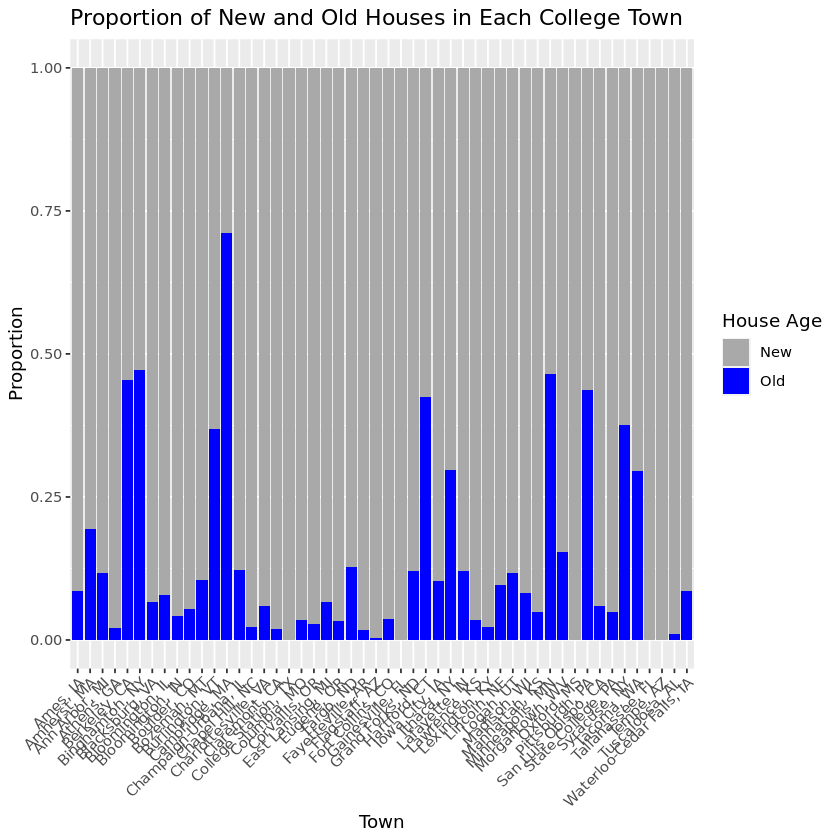

In [23]:
data <- read_excel("Final Project-BU629.xlsx")

# Determine the median build year for Minneapolis
median_build_year_minneapolis <- median(data$Build_year[data$Town == "Minneapolis, MN"], na.rm = TRUE)

data$New_Houses <- ifelse(data$Build_year >= median_build_year_minneapolis, "New", "Old")

# Create a contingency table for new and old houses in each college town
contingency_table <- table(data$Town, data$New_Houses)

# Print contingency table
print(contingency_table)

# Create a stacked column chart with custom colors
ggplot(data, aes(x = Town, fill = New_Houses)) +
  geom_bar(position = "fill") +
  scale_fill_manual(values = c("New" = "dark grey", "Old" = "blue")) + # Custom colors
  labs(title = "Proportion of New and Old Houses in Each College Town", 
       x = "Town", y = "Proportion", fill = "House Age") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Filter data for single-family homes in Minneapolis
filtered_data <- data %>% 
                 filter(Type == "Single Family", Town == "Minneapolis, MN")

# Convert New_Houses to a binary variable for regression analysis in filtered_data
filtered_data$New_Houses <- ifelse(filtered_data$New_Houses == "New", 1, 0)

# New Model g: Sale_amount = β0 + β1Sqft_home + β2Beds + β3Baths + β4Sqft_lot + β5New_Houses + ɛ
model_g <- lm(Sale_amount ~ Sqft_home + Beds + Baths + Sqft_lot + New_Houses, data = filtered_data)
print(summary(model_g)) 

In model G, the coefficient for New_Houses is -$23,617.18, with a p-value of 0.0655. 

*Coefficients:* 

The negative coefficient suggests that new houses (those built in or after the median build year in Minneapolis) are, on average, priced $23,617.18 lower than older houses, all else being equal. This is somewhat counterintuitive since new houses are often expected to fetch higher prices due to factors like modern design, updated features, and less wear and tear.

*Statistical Significance:* 

The p-value for this coefficient is 0.0655, which is slightly above the conventional threshold of 0.05 for statistical significance. This means that while there is a trend indicating new houses are priced lower, we cannot confidently state this as a statistically significant finding at the 95% confidence level. There's about a 6.55% chance that this effect could be due to random variation in the data.

## Location Comparison

Pittsburgh, PA, another college town with similar population and income levels to Minneapolis, MN, was chosen for a comparative study. The regression model forecasts house sale prices, including a location-based dummy variable to capture potential price variations due to the geographical location. The analysis assesses whether the location maintains a linear relationship with the sale price at a 95% significance level.

In [24]:
# Read the data from the Excel file
data <- read_excel("Final Project-BU629.xlsx")

# Determine the median build year for Minneapolis
median_build_year_minneapolis <- median(data$Build_year[data$Town == "Minneapolis, MN"], na.rm = TRUE)

# Create a new variable for New_Houses in the entire dataset
data$New_Houses <- ifelse(data$Build_year >= median_build_year_minneapolis, "New", "Old")

# Create a contingency table for new and old houses in each college town
contingency_table <- table(data$Town, data$New_Houses)

# Select Pittsburgh, PA for comparison with Minneapolis, MN
comparison_town <- "Pittsburgh, PA"

# Create a dummy variable for location, where Minneapolis = 1 and Pittsburgh = 0
data$Location <- ifelse(data$Town == "Minneapolis, MN", 1, ifelse(data$Town == comparison_town, 0, NA))

# Filter data for single-family homes in Minneapolis and Pittsburgh
filtered_data_comparison <- data %>% 
                            filter(Type == "Single Family", Town %in% c("Minneapolis, MN", comparison_town)) %>%
                            na.omit() # Remove rows with NA in the Location column

# New Model for comparing Minneapolis with Pittsburgh
# Sale_amount = β0 + β1Sqft + β2Beds + β3Baths + β4 LSize + β5 Location + ɛ
model_comparison <- lm(Sale_amount ~ Sqft_home + Beds + Baths + Sqft_lot + Location, data = filtered_data_comparison)
print(summary(model_comparison))


Call:
lm(formula = Sale_amount ~ Sqft_home + Beds + Baths + Sqft_lot + 
    Location, data = filtered_data_comparison)

Residuals:
    Min      1Q  Median      3Q     Max 
-405077  -57761   -1319   54521  674268 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.132e+05  1.659e+04  -6.824 1.99e-11 ***
Sqft_home    1.425e+02  9.319e+00  15.288  < 2e-16 ***
Beds        -8.778e+03  6.205e+03  -1.415 0.157666    
Baths        4.498e+04  6.431e+03   6.994 6.51e-12 ***
Sqft_lot     4.397e+00  1.269e+00   3.464 0.000566 ***
Location     7.399e+04  8.439e+03   8.768  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 105900 on 668 degrees of freedom
Multiple R-squared:  0.6106,	Adjusted R-squared:  0.6077 
F-statistic: 209.5 on 5 and 668 DF,  p-value: < 2.2e-16



*Coefficients:*

Intercept: The model estimates the baseline sale amount (with all predictors being zero) at -$113,200. This negative value isn't practically interpretable since again nobody wants a 0 sqft home with no bedrooms or bathrooms.

Sqft_home: The coefficient is 142.50 with a significant p-value (<2e-16). This suggests that each additional square foot is associated with an increase in the sale amount by $142.50, holding other factors constant.

Beds: The coefficient is -8,778, but it's not statistically significant (p = 0.157666). This implies that the number of bedrooms might not be a reliable predictor of sale amount in this model.

Baths: The coefficient is 44,980 and is significant. This indicates that each additional bathroom is associated with an increase in the sale amount by $44,980.

Sqft_lot: The coefficient is 4.40 per square foot of lot size, which is significant. It suggests a smaller but positive relationship between lot size and sale amount.

Location: The coefficient is 73,990 for Minneapolis (since Minneapolis is coded as 1). This means that houses in Minneapolis are, on average, $73,990 more expensive than in Pittsburgh, holding other variables constant. This effect is highly significant.

*Model Fit:*

R-squared: 61.06% of the variability in sale amount is explained by the model, which is a substantial amount but still leaves a portion of the variance unexplained.

Adjusted R-squared: 60.77%, slightly lower than R-squared, takes into account the number of predictors in the model. This is still a strong value, suggesting that the model fits the data well.

F-statistic: The overall model is highly significant (p < 2.2e-16). This indicates that the model is a better fit than an intercept-only model.

*Residuals:*

The range of residuals (-405,077 to 674,268) indicates the variation of the sale amounts around the predicted values. This large range suggests that there are some cases where the model's predictions are quite far from the actual values.

*Interpretation:*

The model effectively captures some key variables affecting house sale prices, particularly square footage and the number of bathrooms.
The location variable (Minneapolis vs. Pittsburgh) has a significant impact on sale prices, indicating notable differences in market values between these two cities.

The analysis confirmed that location maintains a statistically significant linear relationship with sale prices at a 95% confidence level, highlighting the critical role of geographical factors in real estate valuation. 